In [22]:
import os 
from glob import glob 
import pandas as pd
import numpy as np 
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cbook as cbook

In [2]:
OUTPUT = "C:/Users/rlwagner01/Desktop/output"

In [3]:
pattern = os.path.join(OUTPUT, 'RunOne' + '_segregation' + '*')
files = glob(pattern)

n=len(files)*2000

In [4]:
[seg_1,seg_2,seg_3,seg_4,seg_5,seg_6,seg_7] = [np.zeros(n) for i in range(7)]
districts = [seg_1,seg_2,seg_3,seg_4,seg_5,seg_6,seg_7]


In [5]:
for j, file in enumerate(files):
    data = np.genfromtxt(file, delimiter=',',usecols=[1,2,3,4,5,6,7])
    for i in range(7):
        districts[i][0+2000*j:2000+2000*j] = data[:,i]

In [17]:
## Boxplot Settings ====================

# Number of iterations to compare for each set of boxes
#steps = [100, 1000, 10000]
n_trials = n
n_dists = 7

n_steps = 5
steps = np.logspace(2, np.log10(n_trials), n_steps).astype(int)

# Settings for whiskers

# Default - 1.5 of IQR
whis = 1.5

# 1st and 99th percentiles
#whis = [1, 99]

# Min and max
#whis = [0, 100]

# Boxplot properties
#      more examples: https://matplotlib.org/3.1.1/gallery/statistics/boxplot.html

flierprops = dict(marker='.', 
                  markersize=0) # Setting to 0 turns fliers off

medianprops = dict(linestyle='-',
                   color='k')

boxprops = dict(color='k')

## KDE settings

# Have the opportunity to get more granular here
n_steps_kde = 10
kde_steps = np.logspace(2, np.log10(n_trials), n_steps_kde).astype(int)

colors = ['cornflowerblue','teal','red','darkorange','rebeccapurple']


In [101]:
import matplotlib.patches as mpatches

patch_1 = mpatches.Patch(color='cornflowerblue', label='100 Iterations')
patch_2 = mpatches.Patch(color='teal', label='1,073 Iterations')
patch_3 = mpatches.Patch(color='red', label='11,523 Iterations')
patch_4 = mpatches.Patch(color='darkorange', label='123,708 Iterations')
patch_5 = mpatches.Patch(color='rebeccapurple', label='1,328,000 Iterations')

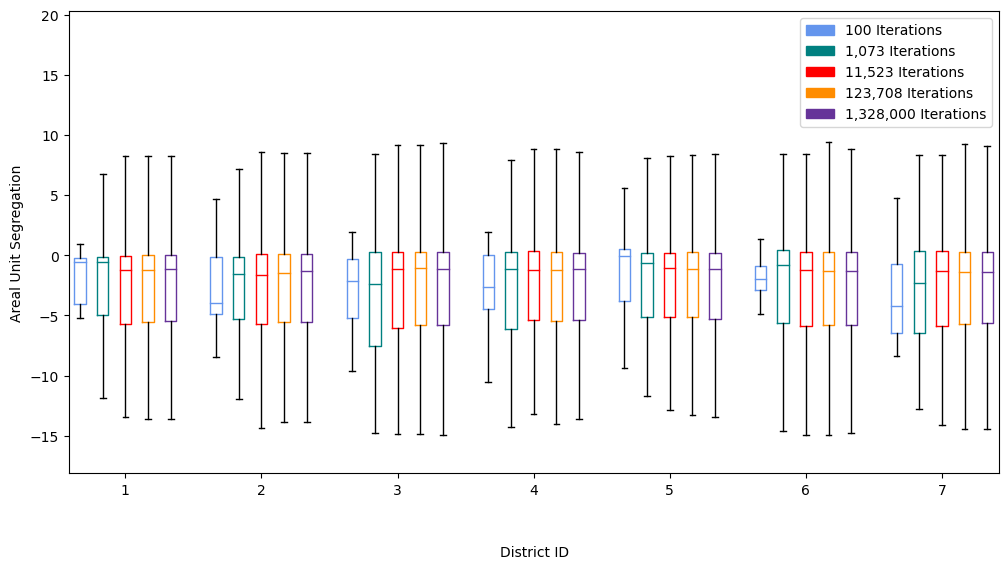

In [102]:
pos = np.arange(0, n_dists)
box_pos = len(steps)*pos + 1
box_pos += range(len(box_pos))

# Position for the x-axis tick labels (in the middle of each districts group of boxes)
tick_pos = box_pos + (len(steps)+1)/2 - 1

fig, ax = plt.subplots(figsize=(12,6))
# Looping over each subset of data (e.g, 100 trials, 1000 trials, etc.)
for i,s in enumerate(steps):
    data = stats[0+7*i:7+7*i]
    # Create the boxplots
    ax.bxp(data, positions = box_pos+i, 
           widths=0.5,
           boxprops = dict(color=colors[i]),
           flierprops = flierprops,
           medianprops = dict(linestyle='-',
                   color=colors[i])
          )
    pos = pos+6

plt.xticks(tick_pos, [1,2,3,4,5,6,7], rotation=0)
plt.ylabel('Areal Unit Segregation')
plt.text(19.5,-25,'District ID')
plt.legend(handles=[patch_1, patch_2, patch_3, patch_4, patch_5], loc='upper right')
#plt.savefig('convergence_bars')
plt.show()

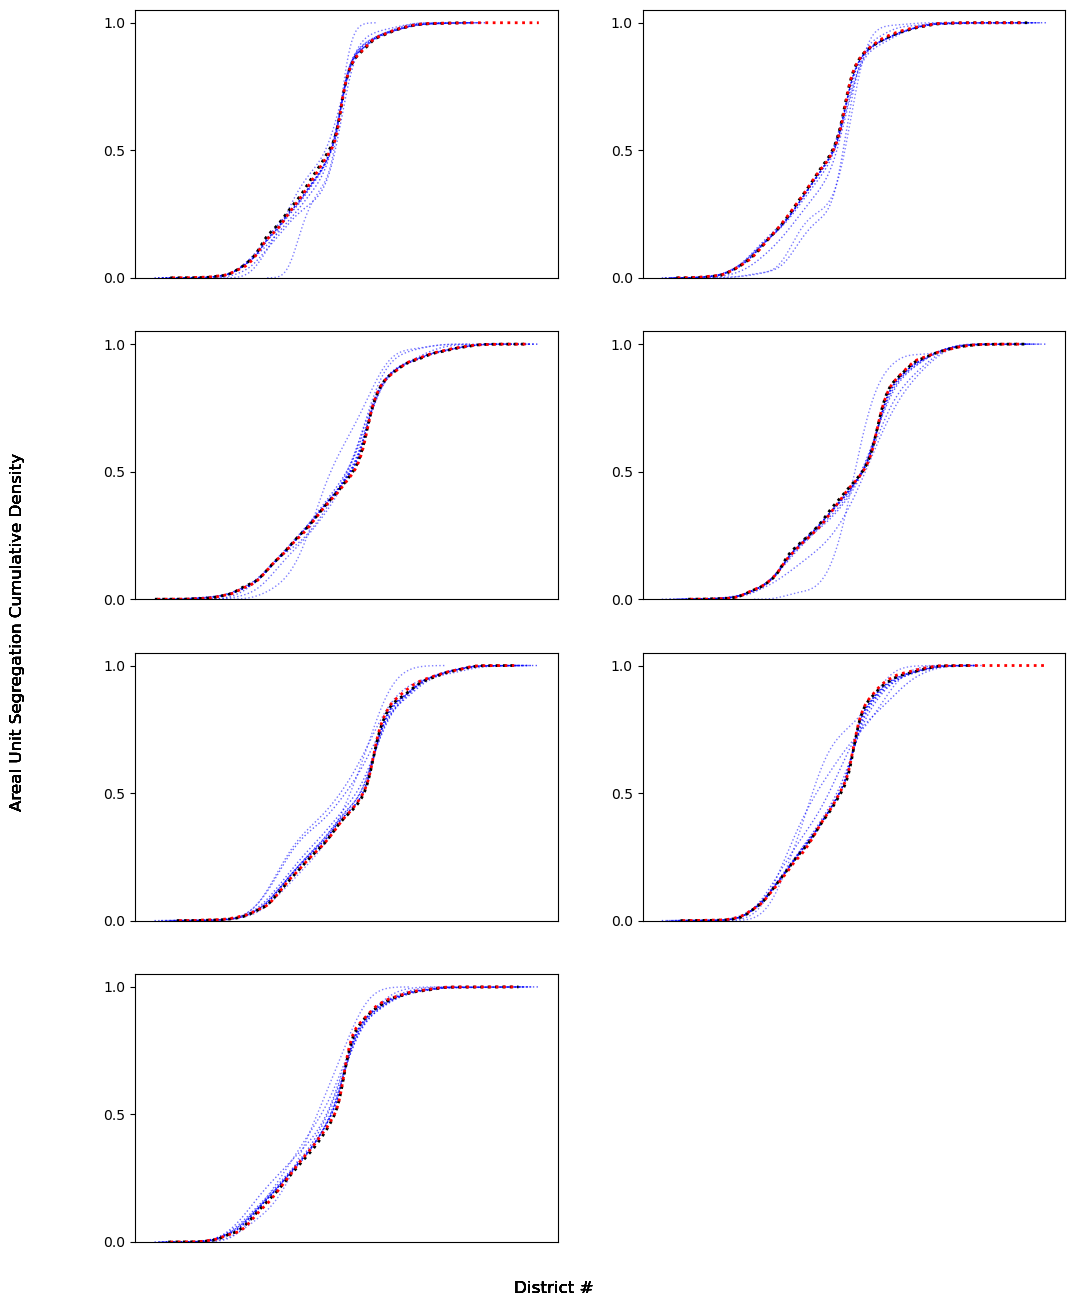

In [51]:
# Showing convergence for individual districts as overlaid cumulative KDE plots

fig, ax = plt.subplots(4,2, figsize=(12,16))
fig.delaxes(ax[3,1])

p=0
q=0

for j in range(0,7):

    temp = districts[j]
    alphas = np.linspace(0.5, 1, len(kde_steps))

    x = 1

    for i,s in enumerate(kde_steps):
        
        # Show smaller samples as thin blue dotted with varying alpha
        # Show final two as dotted black and dotted red, thick
        
        if i == (len(kde_steps)-1):
            linestyle=':'
            color = 'r'
            linewidth = 2
            alpha = 1
        elif i == (len(kde_steps)-2):
            linestyle=':'
            color = 'k'
            linewidth = 2
            alpha = 1
        else:
            linestyle=':'
            color = 'b'
            linewidth = 1
            alpha = alphas[i]

        sns.kdeplot(temp[0:s], 
                    ax = ax[p,q],
                    color = color, 
                    alpha = alpha, 
                    linestyle = linestyle,
                    linewidth = linewidth, 
                    cumulative=True)

        ax[p,q].set_xticks([])
        ax[p,q].set_yticks([0,.5,1])
        ax[p,q].set_ylabel("")
    
    p+=1

    if p==4:
        p=0
        q=1

    plt.text(15,-.2,'District #',fontsize=12)
    plt.text(-30,1.7,'Areal Unit Segregation Cumulative Density',fontsize=12, rotation='vertical')
    #plt.legend(handles=[patch_6, patch_7], bbox_to_anchor=(1.52, .8), loc='lower right')

#plt.savefig('convergence districts')
plt.show()

In [120]:
steps

array([    100,    1073,   11523,  123708, 1328000])

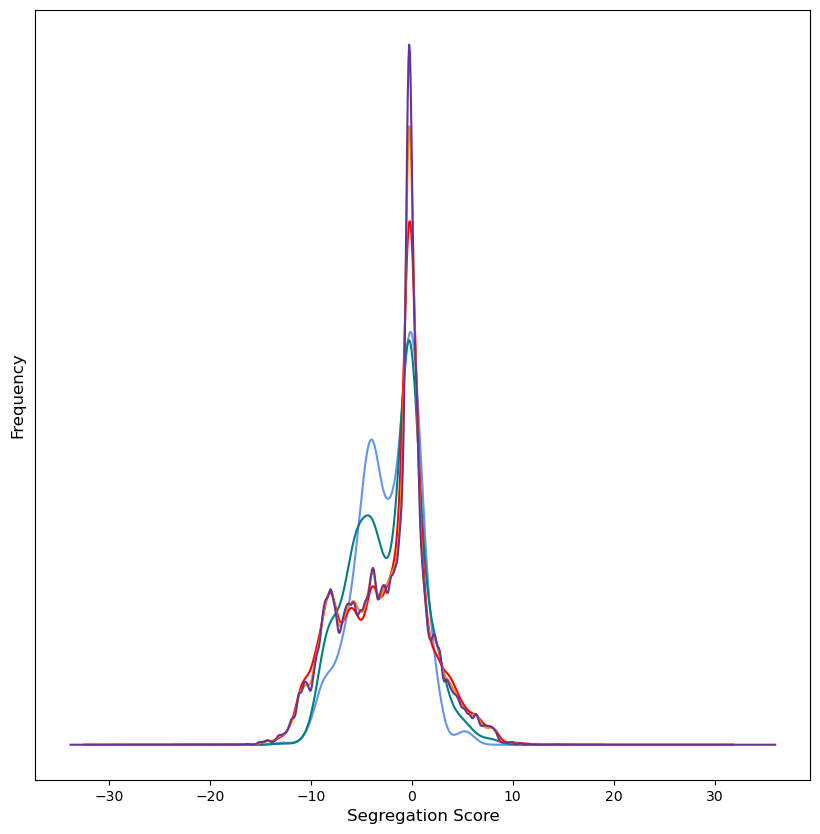

In [121]:
fig1, ax1 = plt.subplots(figsize=(10,10))

pd.DataFrame(np.concatenate([districts[i][:100] for i in range(7)])).plot(kind='density', 
                                                                          ax=ax1, 
                                                                          color=colors[0],
                                                                          legend=False)

pd.DataFrame(np.concatenate([districts[i][:173] for i in range(7)])).plot(kind='density', 
                                                                          ax=ax1, 
                                                                          color=colors[1],
                                                                          legend=False)

pd.DataFrame(np.concatenate([districts[i][:11523] for i in range(7)])).plot(kind='density', 
                                                                          ax=ax1, 
                                                                          color=colors[2],
                                                                          legend=False)

pd.DataFrame(np.concatenate([districts[i][:123709] for i in range(7)])).plot(kind='density', 
                                                                          ax=ax1, 
                                                                          color=colors[3],
                                                                          legend=False)

pd.DataFrame(np.concatenate([districts[i][:1328000] for i in range(7)])).plot(kind='density', 
                                                                          ax=ax1, 
                                                                          color=colors[4],
                                                                          legend=False)

#plt.legend(labels=["30,000 Iterations", "60,000 Iterations", "90,000 Iterations", "120,000 Iterations", "150,000 Iterations"],
           # prop={'size':12})
ax1.set_xlabel("Segregation Score", fontsize=12)
ax1.set_ylabel("Frequency", fontsize=12)
ax1.set_yticks([])

#plt.savefig("line_compare")
plt.show()

In [132]:
original_scores = pd.read_csv("C:/Users/rlwagner01/Desktop/Output/RunOne_segregation_1_2023-03-01-15-00-35-598748").columns[1:]

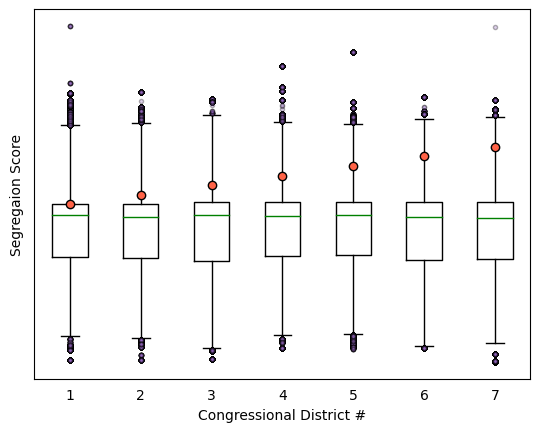

In [174]:
fig, ax = plt.subplots(1,1)

ax.boxplot([districts[i] for i in range(7)],
           flierprops = {'marker':'.',"markerfacecolor":"C4", "markeredgecolor": None, "alpha": .3},
            medianprops ={'color':'green'},
            meanprops = {'color': "black"})

ax.scatter(np.linspace(1,7,num=7), original_scores, c='tomato', edgecolors = 'black', zorder=10)

plt.xlabel("Congressional District #")
plt.yticks([])
plt.ylabel("Segregaion Score")
plt.tick_params(axis='x',bottom=False)
#plt.ylim((-12,12))

ax.grid(which='major', axis='y', linestyle=':', color='gray', alpha=0.5)

#plt.savefig(fname='150k_whiskers')
plt.show()

plt.show()

In [159]:
cbook.boxplot_stats(districts[0])

[{'mean': -2.398826620831552,
  'iqr': 5.491311228982447,
  'cilo': -1.1407051879718715,
  'cihi': -1.1257426016374588,
  'whishi': 8.23262344704007,
  'whislo': -13.615383220666246,
  'fliers': array([-16.16307041, -16.16307041, -16.16307041, ...,  18.55035558,
          10.28559747,  10.38901337]),
  'q1': -5.487071759901742,
  'med': -1.1332238948046651,
  'q3': 0.0042394690807050495}]